In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing CSV files


df_adjust_Limits = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\PVs\adjust_limits.csv")


In [3]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 25


In [4]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425 %Al,Butanol,DI55102,DI55152,DI55580,FC42428,FC55003,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,TC55552,TC55553,TC55555
count,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000,98364.000000
mean,2.398241,170.650855,0.924651,0.945551,0.989757,30833.408519,4543.381610,26693.903237,5169.610871,296.190372,8.586949,1.839066,57.819114,49.984164,46.683444,55.203625,32.761004,46.856275,40.430753,1.776489,-1.097353,140.700211,149.789665,150.743657
std,156.055438,805.146270,0.076280,0.058442,0.056151,11079.204339,2655.558177,15837.118534,2671.040324,287.249622,60.829882,27.542148,16.236426,26.680188,25.846660,28.562680,17.467976,26.169049,21.400593,1.757159,1.231183,59.715673,69.082467,63.284898
min,-9986.000000,0.000000,0.000000,0.000000,0.000000,-428.202000,-24.455300,-12997.800000,0.000000,-9.608200,0.000000,0.000000,-5.000000,-0.631361,-0.631604,-0.627794,-0.750000,0.000000,0.000000,-9.935260,-9.653360,0.000000,0.000000,0.000000
25%,5.973000,4.069775,0.881043,0.916403,0.963618,26625.225000,3448.135000,17902.625000,5746.295000,0.048172,0.946525,0.720717,60.564475,49.078200,42.407300,64.257150,36.813075,27.178700,23.215825,0.501452,-2.028787,142.114750,135.080000,179.596750
50%,6.120340,7.766670,0.937482,0.943772,0.992865,35153.500000,5575.395000,35856.650000,6438.895000,276.091000,0.988695,0.768287,62.875000,64.347250,55.292650,69.324600,40.789050,49.773750,46.344700,1.592900,-0.793724,164.541500,167.756000,180.042000
75%,6.267912,33.820825,0.982996,0.982378,1.021502,38680.600000,6311.205000,38102.900000,6737.560000,459.599750,1.020060,0.787357,64.802400,67.400425,65.155125,71.451650,41.429000,67.218100,56.282525,2.823913,-0.003344,178.439500,191.971000,181.860000
max,8.058320,36301.200000,1.212410,1.317230,1.165180,49959.600000,20772.500000,52000.000000,12933.400000,1537.300000,2955.150000,1224.330000,102.781000,104.850000,104.971000,100.000000,104.992000,87.901600,83.400400,21.190600,8.981880,213.521000,280.195000,297.875000


In [5]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425 %Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200


In [6]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


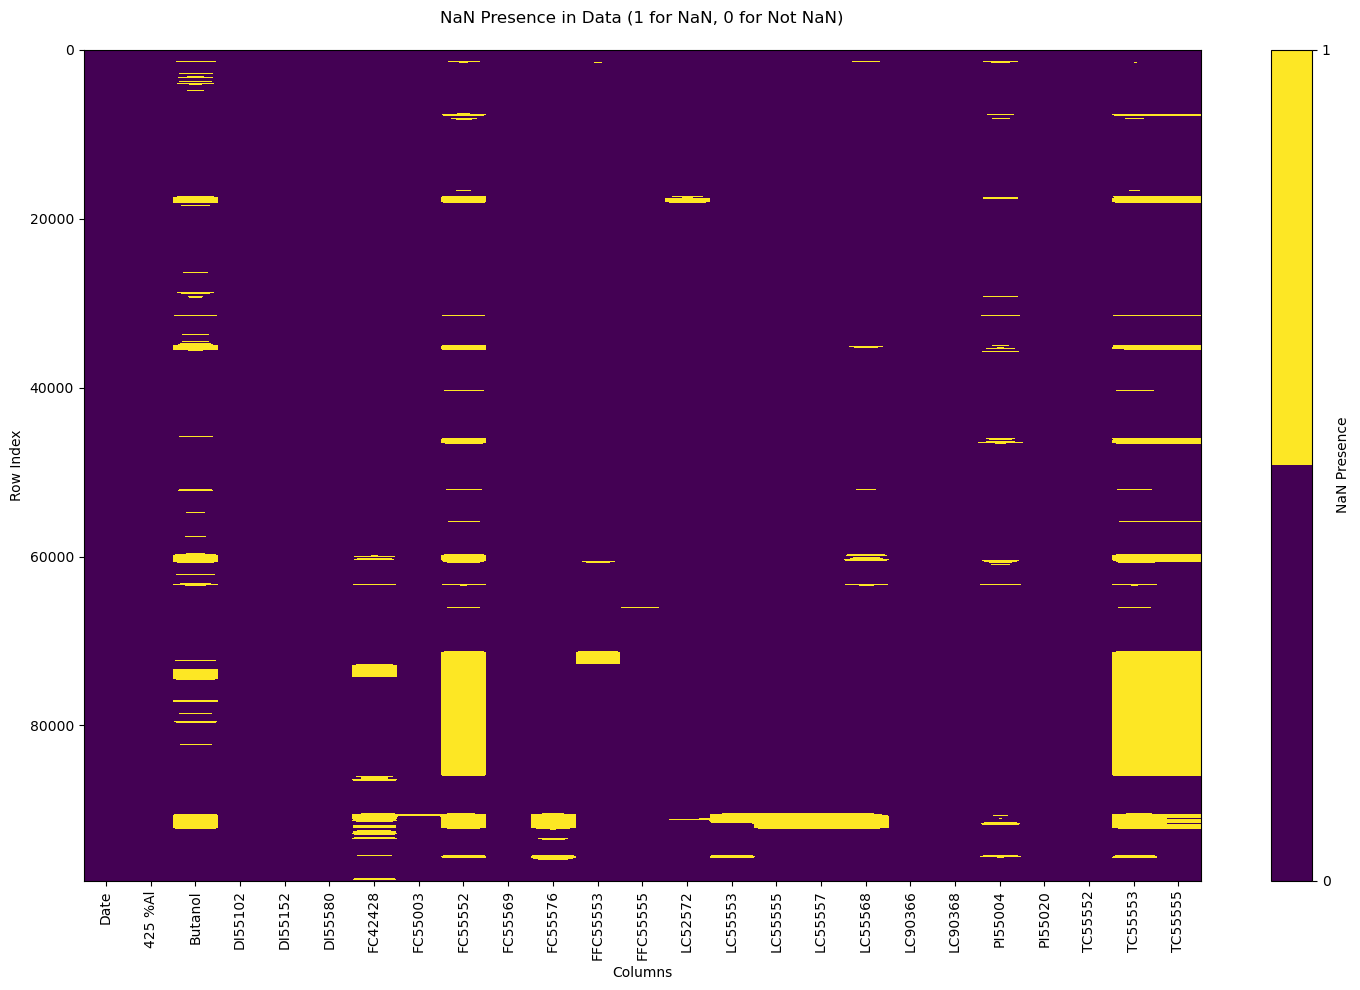

In [7]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [8]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

          ID  total_rows  non_nan_count  nan_count  nan_percentage
0       Date       98364          98364          0        0.000000
1    425 %Al       98364          98294         70        0.071164
2    Butanol       98364          82697      15667       15.927575
3    DI55102       98364          98364          0        0.000000
4    DI55152       98364          98364          0        0.000000
5    DI55580       98364          98364          0        0.000000
6    FC42428       98364          92871       5493        5.584360
7    FC55003       98364          98117        247        0.251108
8    FC55552       98364          74637      23727       24.121630
9    FC55569       98364          98360          4        0.004067
10   FC55576       98364          95238       3126        3.177992
11  FFC55553       98364          94822       3542        3.600911
12  FFC55555       98364          97864        500        0.508316
13   LC52572       98364          97491        873        0.88

In [9]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

          ID  total_rows  non_nan_count  nan_count  nan_percentage
0       Date       64899          64899          0             0.0
1    425 %Al       64899          64899          0             0.0
2    Butanol       64899          64899          0             0.0
3    DI55102       64899          64899          0             0.0
4    DI55152       64899          64899          0             0.0
5    DI55580       64899          64899          0             0.0
6    FC42428       64899          64899          0             0.0
7    FC55003       64899          64899          0             0.0
8    FC55552       64899          64899          0             0.0
9    FC55569       64899          64899          0             0.0
10   FC55576       64899          64899          0             0.0
11  FFC55553       64899          64899          0             0.0
12  FFC55555       64899          64899          0             0.0
13   LC52572       64899          64899          0            

In [10]:
# 73745

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_adjust_Limits.to_csv('adjusted_Limits.csv', index=False)

In [11]:
df_adjust_Limits.describe()

# 64899
# 64357

,425 %Al,Butanol,DI55102,DI55152,DI55580,FC42428,FC55003,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,TC55552,TC55553,TC55555
count,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,6.489900e+04,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000
mean,6.131443,11.710850,0.926903,0.941420,0.995660,35004.980978,5.949903e+03,35412.464156,6616.324857,382.007947,0.991090,0.773585,62.985503,63.448687,58.347415,69.760584,40.780727,46.892832,38.590479,2.351391,-1.404797,167.963618,181.665309,181.038032
std,0.347522,15.671225,0.068814,0.041277,0.050534,6260.874767,1.038822e+03,5497.740319,483.913529,261.840597,0.059842,0.026676,3.167406,7.009572,10.493980,3.252506,2.827524,27.756188,20.480352,1.328582,1.134191,15.898895,28.868411,1.823016
min,0.155707,0.000000,0.000000,0.000000,0.000000,0.164385,1.930000e-17,7377.560000,0.000000,0.000000,0.042564,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,0.000000,0.006367,0.000000,-5.655290,108.104000,102.756000,100.587000
25%,5.991825,3.650000,0.888465,0.914465,0.965426,32482.350000,5.370930e+03,34042.850000,6346.035000,207.677000,0.969817,0.759142,61.611900,60.079650,49.821550,67.784000,40.291750,23.865700,22.131400,1.311130,-2.273825,155.534000,160.525500,179.969000
50%,6.138610,5.833330,0.936895,0.937696,0.996114,37390.800000,5.954140e+03,37779.100000,6574.130000,349.901000,0.992460,0.777164,63.281300,65.426200,60.098400,70.111900,41.144800,49.408500,44.517700,2.081620,-1.366900,171.679000,176.362000,180.146000
75%,6.296925,11.702800,0.979357,0.962219,1.029220,39247.950000,6.538325e+03,38967.100000,6827.105000,550.221000,1.018340,0.789951,64.913050,68.135650,67.039250,71.990300,41.549700,72.738050,53.915500,3.171880,-0.412031,180.515000,201.718500,182.059000
max,8.058320,99.950000,1.120200,1.070140,1.165180,49959.600000,1.470590e+04,52000.000000,10503.000000,1472.050000,1.475490,0.998409,87.280300,93.684100,99.818500,90.552700,95.861700,87.901600,81.210800,12.531800,2.692840,207.426000,261.360000,239.332000
